**if you want lasso call OneReg(). if you want KSparse call KSparseConstraint(k), where k is the number of non-zero features you want in the weights. https://github.com/madeleineudell/LowRankModels.jl#technical-details**

**No reason to use anything besides QuadLoss() for the loss function of the prox grad method. But the above link has lists of available of different loss functions and regulizers.**

**ConvergenceHistory plots can help you determine if you're converging. call ch.objective for a full list of objective values at each iteration.**

**If your weights look too big/the obj value isnt decreasing, decrease the stepsize (e.g. 1E-5 or 1/norm(X)). Also, feel free to increase max iterations to get a good value! the above only matter for proxgrad calls.**

**QR just needs the backslash \ operator. use hcat to combine different columns into an X to pass in. dataframe columns can be called using df[:name]. Also, use a ; at the end of a line to prevent it from outputting (gets annoying for data assignments**

In [21]:
using Plots, Random, LinearAlgebra, Statistics, SparseArrays, DataFrames, LowRankModels, CSV

In [8]:
import LowRankModels: evaluate, grad
evaluate(loss::Loss, X::Array{Float64,2}, w, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w, y) = X'*grad(loss, X*w, y)

grad (generic function with 19 methods)

In [9]:
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w
end

proxgrad (generic function with 1 method)

In [28]:
function MSE(y, pred)
sum((y - pred).^2)/size(y, 1)
end
"""This function plots the main diagonal;
for a "predicted vs true" plot with perfect predictions, all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end
"""This helper funciton plots x vs, y and labels the axe s."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=tru e, zeromin=false)
scatter(x,y, label="data") xlabel!(xname)
ylabel!(yname)
range_y = maximum(y) - minimum(y) range_x = maximum(x) - minimum(x) if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+m
argin*range_x)
end
if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*
range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*
range_x))
end end
"""This function plots the predicted labels vs the actual la
bels
(We only plots the first 1000 points to avoid slow plot
s.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000 )
plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

LoadError: syntax: missing comma or ) in argument list

In [581]:
df1 = CSV.read("rainfalltemp.csv");
df1 = df1[.!(ismissing.(df1[!, :sum_paid])), :];
df1 = df1[shuffle(1:end), :]

feature_names = names(df1)
for i in 1:35
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df1[!, i])))
end

1	Column1			Int64
2	Latitude			Float64
3	Longitude			Float64
4	Column4			String
5	sum_paid			Float64
6	jan_r			Float64
7	feb_r			Float64
8	mar_r			Float64
9	apr_r			Float64
10	may_r			Float64
11	jun_r			Float64
12	jul_r			Float64
13	aug_r			Float64
14	sep_r			Float64
15	oct_r			Float64
16	nov_r			Float64
17	dec_r			Float64
18	avg_r			Float64
19	jan_t			Float64
20	feb_t			Float64
21	mar_t			Float64
22	apr_t			Float64
23	may_t			Float64
24	jun_t			Float64
25	jul_t			Float64
26	aug_t			Float64
27	sep_t			Float64
28	oct_t			Float64
29	nov_t			Float64
30	dec_t			Float64
31	avg_t			Float64
32	WaterBody			String
33	SLChange			Float64
34	altitude			Float64
35	body_code			Int64


In [588]:
train_proportion = 0.8
n = size(df1, 1)

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
# 
data = df1
target = df1[:, :sum_paid]

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain:end,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain:end,:];

In [589]:
train_y = train_y
test_y = test_y;

In [590]:
delete!(train_x,:sum_paid)
delete!(test_x,:sum_paid)
delete!(train_x,:Column4)
delete!(test_x,:Column1)
delete!(train_x,:Column1)
delete!(test_x,:Column4)

┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:1
└ @ Core In[590]:1
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:2
└ @ Core In[590]:2
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:3
└ @ Core In[590]:3
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:4
└ @ Core In[590]:4
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:5
└ @ Core In[590]:5
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[590]:6
└ @ C

,Latitude,Longitude,jan_r,feb_r,mar_r,apr_r,may_r,jun_r,jul_r
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,30.4,-96.0,10.9432,10.118,9.99431,10.1822,15.58,14.1811,10.2954
2,26.8,-80.9,8.94927,9.57992,11.263,11.073,17.1636,25.8171,18.1334
3,35.4,-76.3,15.7475,16.0584,12.9754,15.3267,12.0292,17.4133,20.5774
4,40.7,-73.5,11.584,10.9677,13.5277,12.4264,12.9917,11.6458,13.4768
5,35.0,-79.7,11.3853,12.7349,9.42424,8.63065,10.4762,14.727,15.8719
6,44.1,-70.2,7.4289,6.02405,7.88889,9.90012,8.56657,10.3139,10.2563
7,39.1,-122.9,32.8686,31.5834,24.8048,11.2201,4.87686,1.27133,0.167064
8,34.3,-118.4,10.6573,10.8587,7.6174,3.19881,0.812619,0.20716,0.0569827
9,39.0,-77.5,8.47662,9.17887,10.8105,9.42324,10.2474,9.33715,10.0724


In [653]:
Xtr = hcat(train_x[:Latitude],train_x[:Longitude],train_x[:jan_t],train_x[:feb_t],train_x[:mar_t],train_x[:apr_t],
        train_x[:may_t],train_x[:jun_t],train_x[:jul_t],train_x[:aug_t],train_x[:sep_t],
        train_x[:oct_t],train_x[:nov_t],train_x[:dec_t],train_x[:avg_t], train_x[:jan_r],train_x[:feb_r],
        train_x[:mar_r],train_x[:apr_r],train_x[:may_r],train_x[:jun_r], train_x[:jul_r],train_x[:aug_r],
        train_x[:sep_r],train_x[:oct_r],train_x[:nov_r],train_x[:dec_r],train_x[:avg_r],
        train_x[:SLChange],train_x[:altitude], ones(size(train_x,1)))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[653]:1
└ @ Core In[653]:1
┌ Warning:

6846×31 Array{Float64,2}:
 32.1   -81.0  49.9129  53.5873  59.5795  …  11.9134   18.4713    0.0  1.0
 31.1   -95.4  51.5876  55.2517  61.0005     12.3291   24.467    71.7  1.0
 31.4   -92.7  49.9129  53.5873  59.5795     16.2168   24.467    26.4  1.0
 39.5   -77.0  31.4683  34.2809  41.9895     13.1464   18.4713  246.4  1.0
 32.5   -85.7  49.9129  53.5873  59.5795     13.4534   24.467    94.2  1.0
 43.1  -124.4  48.2938  48.9038  49.2736  …   8.82632  16.4686   37.9  1.0
 35.7   -80.3  48.7069  53.4301  58.1089     12.7448   18.4713  189.2  1.0
 31.1   -83.8  51.5876  55.2517  61.0005     17.2798   24.467    91.5  1.0
 34.0   -78.8  56.244   57.2536  60.1174     12.7448   18.4713   12.9  1.0
 42.2   -71.7  23.7335  27.336   37.8004      8.82632  18.4713  115.1  1.0
 30.0   -98.5  51.5876  55.2517  61.0005  …  12.2784   24.467   486.2  1.0
 29.9   -97.4  51.5876  55.2517  61.0005     12.2784   24.467   168.8  1.0
 27.5   -81.0  60.3631  63.384   67.2393      6.84956  18.4713   19.9  1.0

In [652]:
Xte = hcat(test_x[:Latitude],test_x[:Longitude],test_x[:jan_t],test_x[:feb_t],test_x[:mar_t],test_x[:apr_t],
        test_x[:may_t],test_x[:jun_t],test_x[:jul_t],test_x[:aug_t],test_x[:sep_t],
        test_x[:oct_t],test_x[:nov_t],test_x[:dec_t],test_x[:avg_t], test_x[:jan_r],test_x[:feb_r],
        test_x[:mar_r],test_x[:apr_r],test_x[:may_r],test_x[:jun_r], test_x[:jul_r],test_x[:aug_r],
        test_x[:sep_r],test_x[:oct_r],test_x[:nov_r],test_x[:dec_r],test_x[:avg_r],
        test_x[:SLChange],test_x[:altitude], ones(size(test_x,1)))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[652]:1
└ @ Core In[652]:1
┌ Warning:

1713×31 Array{Float64,2}:
 30.4   -96.0  51.5876  55.2517  61.0005  …  12.3291   24.467   115.1  1.0
 26.8   -80.9  66.1075  68.2869  70.7853     16.0878   18.4713    2.3  1.0
 35.4   -76.3  48.7069  53.4301  58.1089     18.3878   18.4713    0.3  1.0
 40.7   -73.5  46.4937  50.0722  53.9618     12.8415   18.4713   16.2  1.0
 35.0   -79.7  37.1765  40.4289  48.5727     12.7448   18.4713   87.3  1.0
 44.1   -70.2  34.6178  38.2515  44.9732  …   8.82632  18.4713   78.6  1.0
 39.1  -122.9  34.2696  37.6238  45.8379     14.1861   16.4686  406.0  1.0
 34.3  -118.4  40.5325  44.0884  51.0245      3.85772  16.4686  430.5  1.0
 39.0   -77.5  32.9884  35.7725  43.4182      9.83832  18.4713   89.1  1.0
 35.9   -76.7  48.7069  53.4301  58.1089     13.4313   18.4713    0.1  1.0
 41.3   -73.0  31.3886  35.2064  40.1171  …  12.8415   18.4713   66.3  1.0
 34.7   -77.7  59.2767  60.239   61.8888     18.3878   18.4713   18.1  1.0
 38.9  -121.1  32.41    35.1441  42.8312     11.6115   16.4686  323.9  1.0

In [625]:
w_qr = Xtr\train_y

31×1 Array{Float64,2}:
 -74676.51329318364        
   4997.84582880182        
      1.407506273215802e14 
      1.4075066985271353e14
      1.407506472712723e14 
      1.4075064568689928e14
      1.4075063077989472e14
      1.4075066770954525e14
      1.4075063519681678e14
      1.4075068297718428e14
      1.407506215216426e14 
      1.4075066722216028e14
      1.40750641135669e14  
      ⋮                    
     -1.0503085068853353e14
     -1.0503085179766389e14
     -1.0503085264330717e14
     -1.0503085194424125e14
     -1.0503085234103012e14
     -1.0503085268662073e14
     -1.05030852081549e14  
     -1.0503085170074192e14
      1.2603702256996248e15
 169291.6907579186         
   8330.128357346362       
      1.7885417330914028e7 

In [626]:
preds = Xtr*w_qr

6846×1 Array{Float64,2}:
  3.08176e6           
  1.251608e7          
  4.359712e6          
  1.4042272e7         
  2.116528e6          
  7.18656e6           
  2.3451008e7         
  8.839896e6          
 -1.34636e6           
  7.497136e6          
  1.0616064e7         
  7.985048e6          
  1.1871656e7         
  ⋮                   
  1.071528e7          
 -2.052904e6          
  1.2451232e7         
  1.1299008e7         
  1.244648e7          
  1.3353e7            
  1.2160888e7         
  1.0841376e7         
  8.62708e6           
  8.0264e6            
  1.179497858629128e6 
  1.2926869220154075e7

In [627]:
MSE(train_y,preds)

1.2255763520229678e15

In [628]:
MSE(test_y,Xte*w_qr)

4.685700009554952e28

In [629]:
ch = ConvergenceHistory("QuadLoss")
w_pg = proxgrad(QuadLoss(),ZeroReg(), Xtr, train_y[:,1], stepsize = 1*10^-12, maxiters = 30000, ch = ch)

31-element Array{Float64,1}:
  7581.069685772388  
 -2286.723445663659  
  7176.269964785167  
  8587.556939179267  
  8274.641256325369  
  7946.592357400436  
 10321.660093170538  
 13562.373677096633  
 16624.120443112213  
 15116.80050106871   
 12525.339763772552  
  9564.681458804162  
  6840.712469014316  
     ⋮               
  3269.252150269755  
  2926.6037294091143 
  4004.584876260029  
  2261.395751108222  
  1740.8802444610628 
 -1617.9804256900056 
 -5010.513723715972  
 -2793.912391683745  
  -197.14959569272045
  4014.497918075299  
  9773.147492640153  
   204.49648872139397

In [630]:
MSE(train_y,Xtr * w_pg)

1.377764741223985e15

In [631]:
MSE(test_y, Xte*w_pg)

1.2167063622766622e15

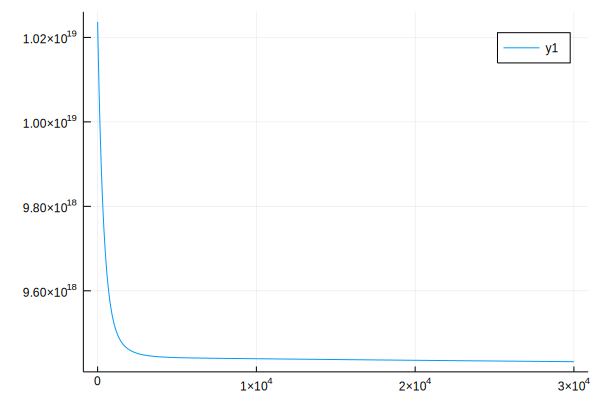

In [632]:
plot(ch.objective)

In [633]:
ch.objective[end]

9.4321774184194e18

In [634]:
ch = ConvergenceHistory("HuberLoss")
w_pg = proxgrad(HuberLoss(),ZeroReg(), Xtr, train_y[:,1], stepsize = 1*10^-12, maxiters = 30000, ch = ch)

31-element Array{Float64,1}:
  0.005965195176571193  
 -0.015693413537489802  
  0.008013065203928953  
  0.008558809281147817  
  0.009526213237634213  
  0.010634744158441413  
  0.011925757928264395  
  0.013051768797773552  
  0.013650605514827574  
  0.013520823667178676  
  0.012723029601997645  
  0.011170860876906387  
  0.009567122991918536  
  ⋮                     
  0.0020220057330137785 
  0.002405048486683433  
  0.0024573016802847273 
  0.002593941912811687  
  0.00252193257725963   
  0.00205885654404266   
  0.0020936929922134003 
  0.002138567689307991  
  0.0022191254316831356 
  0.003507855041745224  
  0.020123082652537823  
  0.00017191716006020424

In [635]:
ch.objective[end]

7.309413569946097e10

In [636]:
MSE(train_y,Xtr * w_pg)

1.4955471417781448e15

In [637]:
MSE(test_y, Xte*w_pg)

1.3468481966252275e15

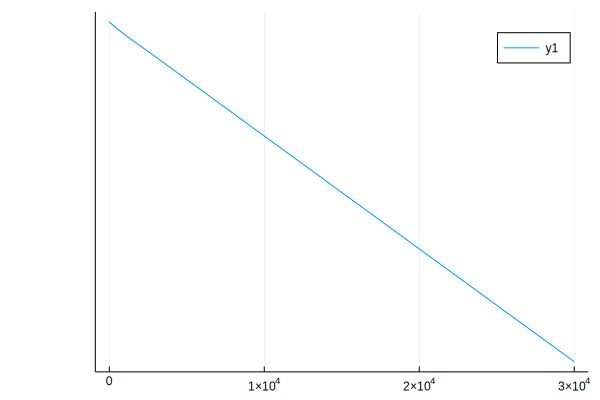

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168


In [638]:
plot(ch.objective)

In [641]:
ch = ConvergenceHistory("HuberLoss")
w_pg = proxgrad(HuberLoss(),OneReg(), Xtr, train_y[:,1], stepsize = 1*10^-10, maxiters = 30000, ch = ch)
ch.objective[end]

7.308665338084074e10

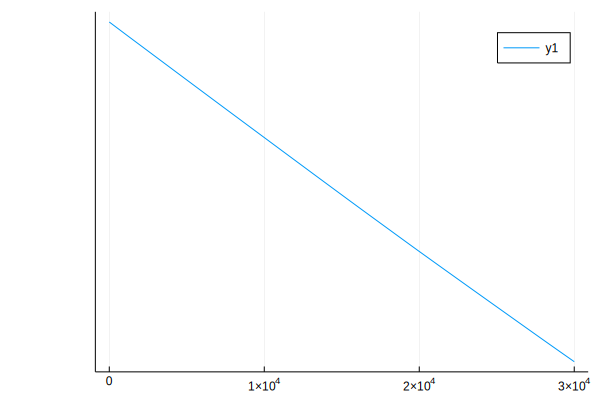

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/siddharthkantamneni/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168


In [642]:
plot(ch.objective)

In [643]:
ch = ConvergenceHistory("HuberLoss")
w_pg = proxgrad(HuberLoss(),QuadReg(), Xtr, train_y[:,1], stepsize = 1*10^-9, maxiters = 30000, ch = ch)
ch.objective[end]

7.3037271487586e10

In [655]:
ch = ConvergenceHistory("HuberLoss")
w_pg = proxgrad(HuberLoss(),KSparseConstraint(7), Xtr, train_y[:,1], stepsize = 1*10^-9, maxiters = 30000, ch = ch)
ch.objective[end]

7.30564501045828e10

In [675]:
Xtr = hcat(train_x[:Latitude],train_x[:Longitude],train_x[:avg_t],train_x[:avg_r],
        train_x[:SLChange],train_x[:altitude], ones(size(train_x,1)), train_y)

Xte = hcat(test_x[:Latitude],test_x[:Longitude],test_x[:avg_t], test_x[:avg_r],
        test_x[:SLChange],test_x[:altitude], ones(size(test_x,1)), test_y);

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[675]:1
└ @ Core In[675]:1
┌ Warning:

In [676]:
w_qr = Xtr\train_y

8×1 Array{Float64,2}:
 -4.844170982529727e-12 
 -5.911682812557767e-13 
 -1.0894057588783927e-11
 -7.390690271166296e-12 
  1.5926392139668243e-11
 -1.200849274565702e-13 
  5.256156990879734e-10 
  1.0                   

In [677]:
println(MSE(train_y,Xtr*w_qr))
println(MSE(test_y,Xte*w_qr))


9.280300473346944e-21
8.958992267871092e-21


In [694]:
ch = ConvergenceHistory("HuberLoss")
w_pg = proxgrad(HuberLoss(),ZeroReg(), Xtr, train_y[:,1], stepsize = 1*10^-16, maxiters = 10000, ch = ch)
print(w_pg)
ch.objective[end]

[2.199744020664579e-7, -5.775984046935474e-7, 3.946532316457886e-7, 8.167891818856685e-8, 1.26947321604232e-7, 7.703157933690576e-7, 6.277934545310073e-9, 0.07309421389046016]

6.7751449785051e10

In [660]:
println(MSE(train_y,Xtr*w_pg))
println(MSE(test_y,Xte*w_pg))

1.4954838721935845e15
1.3467931868222568e15


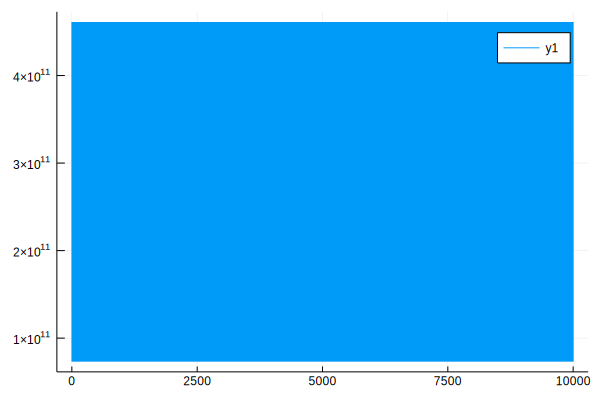

In [693]:
plot(ch.objective)